## Novena Clase, Análisis de Regresion. UNAM Acatlan

## Estimación de parámetros parte I de III

In [2]:
pip install faraway

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 2.5 MB/s eta 0:00:00


In [3]:
###########################################
###Importamos librerias de interes      ###
###########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import faraway.utils

Analisis exploratorio de variables

In [4]:
import faraway.datasets.pima
pima = faraway.datasets.pima.load()
pima

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
print(faraway.datasets.pima.DESCR)


Diabetes survey on Pima Indians

Description

The National Institute of Diabetes and Digestive and Kidney Diseases conducted a study on 768 adult female Pima Indians living near Phoenix.

Usage

data(pima)
Format

The dataset contains the following variables

pregnant
Number of times pregnant

glucose
Plasma glucose concentration at 2 hours in an oral glucose tolerance test

diastolic
Diastolic blood pressure (mm Hg)

triceps
Triceps skin fold thickness (mm)

insulin
2-Hour serum insulin (mu U/ml)

bmi
Body mass index (weight in kg/(height in metres squared))

diabetes
Diabetes pedigree function

age
Age (years)

test
test whether the patient shows signs of diabetes (coded 0 if negative, 1 if positive)

Source

The data may be obtained from UCI Repository of machine learning databases at http://archive.ics.uci.edu/ml/



In [6]:
pima.describe().round()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,4.0,121.0,69.0,21.0,80.0,32.0,0.0,33.0,0.0
std,3.0,32.0,19.0,16.0,115.0,8.0,0.0,12.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.0,0.0,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.0,32.0,0.0,29.0,0.0
75%,6.0,140.0,80.0,32.0,127.0,37.0,1.0,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.0,2.0,81.0,1.0


In [7]:
print(pima['diastolic'].sort_values().head())
print(pima['diastolic'].sort_values().tail())
print(pima.diastolic)
print(pima[106:])

347    0
494    0
222    0
81     0
78     0
Name: diastolic, dtype: int64
549    110
43     110
177    110
691    114
106    122
Name: diastolic, dtype: int64
0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: diastolic, Length: 768, dtype: int64
     pregnant  glucose  diastolic  triceps  insulin   bmi  diabetes  age  test
106         1       96        122        0        0  22.4     0.207   27     0
107         4      144         58       28      140  29.5     0.287   37     0
108         3       83         58       31       18  34.3     0.336   25     0
109         0       95         85       25       36  37.4     0.247   24     1
110         3      171         72       33      135  33.3     0.199   24     1
..        ...      ...        ...      ...      ...   ...       ...  ...   ...
763        10      101         76       48      180  32.9     0.171   63     0
764         2      122         70       27        0  36

In [8]:
#Valores en cero de la variable diastolic

print(np.sum(pima['diastolic']==0))
print(pima['diastolic']>50)

35
0       True
1       True
2       True
3       True
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Name: diastolic, Length: 768, dtype: bool


In [9]:
#### Reemplazamos valores nulos por ceros

pima.replace({'diastolic':0,
              'triceps':0,
              'insulin':0,
              'glucose':0,
              'bmi':0}, np.nan, inplace=True)

In [10]:
print(pima.info())
print(pima['test'].head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    763 non-null    float64
 2   diastolic  733 non-null    float64
 3   triceps    541 non-null    float64
 4   insulin    394 non-null    float64
 5   bmi        757 non-null    float64
 6   diabetes   768 non-null    float64
 7   age        768 non-null    int64  
 8   test       768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None
0    1
1    0
2    1
3    0
4    1
Name: test, dtype: int64


In [11]:
### Generamos un pequeño conteo de los datos
pima['test']=pima['test'].astype('category')
pima['test']=pima['test'].cat.rename_categories(['Negative','Positive'])
pima['test'].value_counts()

Negative    500
Positive    268
Name: test, dtype: int64

In [12]:
print(pima.info())
print(pima['test'].head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pregnant   768 non-null    int64   
 1   glucose    763 non-null    float64 
 2   diastolic  733 non-null    float64 
 3   triceps    541 non-null    float64 
 4   insulin    394 non-null    float64 
 5   bmi        757 non-null    float64 
 6   diabetes   768 non-null    float64 
 7   age        768 non-null    int64   
 8   test       768 non-null    category
dtypes: category(1), float64(6), int64(2)
memory usage: 49.0 KB
None
0    Positive
1    Negative
2    Positive
3    Negative
4    Positive
Name: test, dtype: category
Categories (2, object): ['Negative', 'Positive']


<ipython-input-13-6cf3856182b4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.diastolic.dropna())


<Axes: xlabel='diastolic', ylabel='Density'>

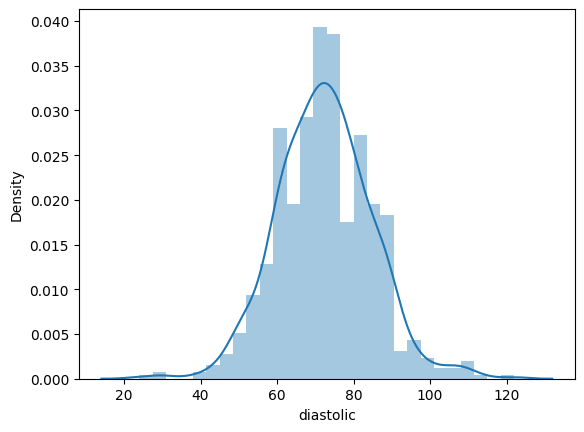

In [13]:
### Graficamos la distribución de los datos

sns.distplot(pima.diastolic.dropna())

<ipython-input-14-d2b7eaeec722>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pima.insulin.dropna())


<Axes: xlabel='insulin', ylabel='Density'>

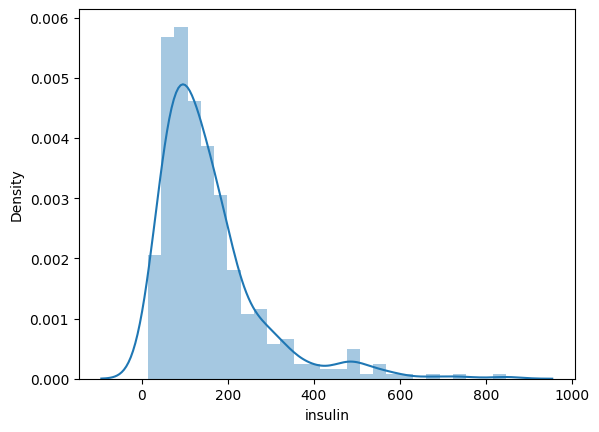

In [14]:
sns.distplot(pima.insulin.dropna())

<Axes: ylabel='diastolic'>

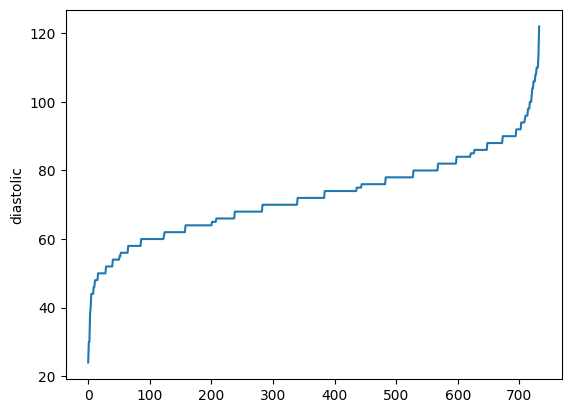

In [15]:
### Distribución ordenada de valores

pimad=pima.diastolic.dropna().sort_values()
sns.lineplot(x=range(0, len(pimad)), y=pimad)

<Axes: xlabel='diastolic', ylabel='diabetes'>

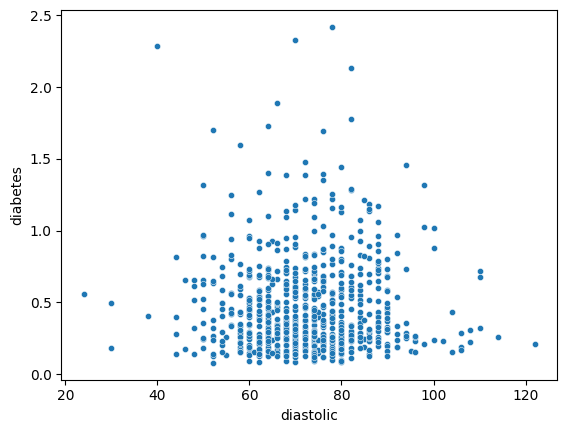

In [16]:
## Gráfica de dispersión entre X e Y

sns.scatterplot(x='diastolic',y='diabetes', data=pima, s=20)

<Axes: xlabel='test', ylabel='diabetes'>

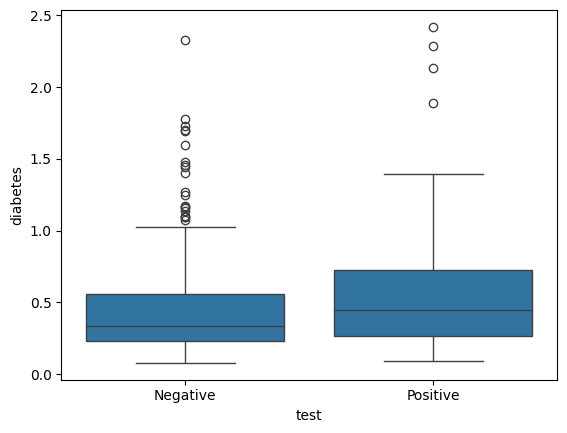

In [17]:
## Barras y bigotes para conocer la distribución de diabetes respecto al tipo de Test

sns.boxplot(x='test',y='diabetes', data=pima)

<Axes: xlabel='test', ylabel='diastolic'>

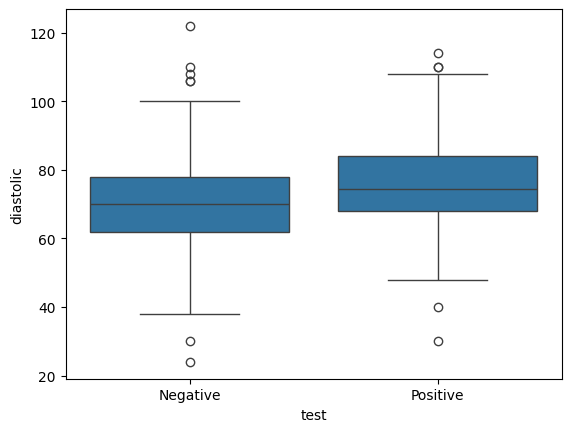

In [18]:
sns.boxplot(x='test',y='diastolic', data=pima)

<Axes: xlabel='diastolic', ylabel='diabetes'>

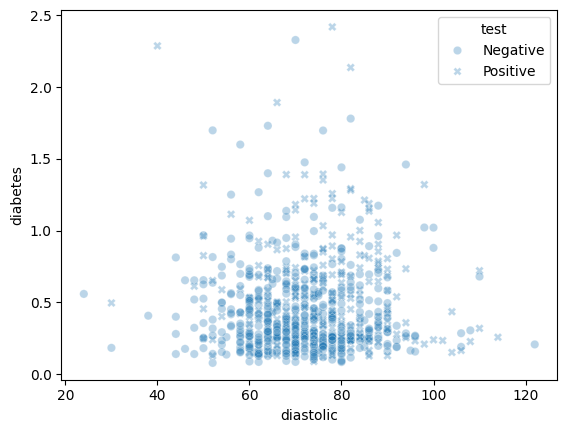

In [19]:
## Gráfica de dispersión X e Y por la variable Test

sns.scatterplot(x='diastolic',y='diabetes', data=pima, style='test', alpha=0.3)

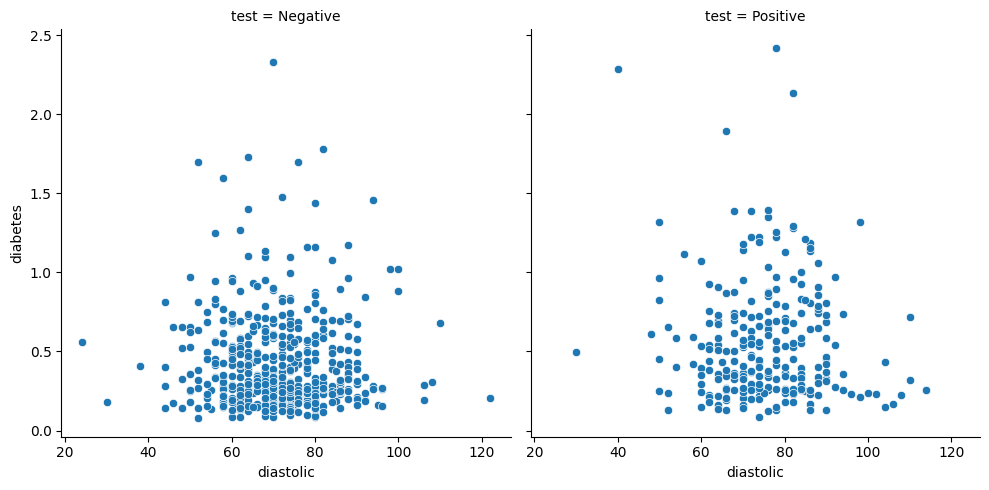

In [20]:
sns.relplot(x='diastolic', y='diabetes', data=pima, col='test')

## Analisis de relación causal entre variables

In [21]:
import faraway.datasets.manilius
manilius = faraway.datasets.manilius.load()
manilius.head(10)

,arc,sinang,cosang,group
0,13.166667,0.8836,-0.4682,1
1,13.133333,0.9996,-0.0282,1
2,13.200000,0.9899,0.1421,1
3,14.250000,0.2221,0.9750,3
4,14.700000,0.0006,1.0000,3
5,13.016667,0.9308,-0.3654,1
6,14.516667,0.0602,0.9982,3
7,14.950000,-0.1570,0.9876,2
8,13.083333,0.9097,-0.4152,1
9,13.033333,1.0000,0.0055,1


In [22]:
print(faraway.datasets.manilius.DESCR)


Mayer's 1750 data on the Manilius crater on the moon

Description

In 1750, Tobias Mayer collected data on various landmarks on the moon in order to determine its orbit. The data involving the position of the Manilius crater resulted in a least squares like problem. The example is discussed in Steven Stigler's History of Statistics.

Usage

data(manilius)
Format

A data frame with 27 observations on the following 4 variables.

arc
an angle known as h in Stigler's notation

sinang
the sin(g-k) where g and k are two angles in Stigler

cosang
the cos(g-k) where g and k are two angles in Stigler

group
one of three groups determined by Mayer

Details

See Stigler for a detailed description.

Source

Stigler, S. (1986) History of Statistics. Belknap Press, Harvard.

References

Mayer, T. (1750) Abhandlung uber die Umwaltzung des Monds um seine Axe und die scheinbare Bewegung der Mondsflecken published in the Kosmographische Nachrichten und Sammlungen auf das Jahr 1748. 52-183



In [23]:
## Agrupamos por cada uno de los valores de la variable group y sumamos los valores de cada una de las columnas

moon3=manilius.groupby('group').sum()
moon3

,arc,sinang,cosang
group,,,
1,118.133333,8.4987,-0.7932
2,140.283333,-6.1404,1.7443
3,127.533333,2.9777,7.9649


In [24]:
moon3['intercept']=[9]*3

In [25]:
moon3

,arc,sinang,cosang,intercept
group,,,,
1,118.133333,8.4987,-0.7932,9
2,140.283333,-6.1404,1.7443,9
3,127.533333,2.9777,7.9649,9


In [26]:
### Si solo tuvieramos los datos agregados de las variables como podrìamos encontrar un modelo de regresión
### La solución al sistema de ecuaciones es:

np.linalg.solve(moon3[['intercept','sinang','cosang']],moon3['arc'])

array([14.54458591, -1.48982207,  0.13412639])

In [27]:
### Si hubieramos ocupado regresión:

mod=smf.ols('arc ~ sinang + cosang', manilius).fit()
mod.params

Intercept    14.561624
sinang       -1.504581
cosang        0.091365
dtype: float64

¿Porqué tenemos diferencias?

## *Un ejemplo simple de regresión usando la correlación*

In [28]:
import faraway.datasets.families
families = faraway.datasets.families.load()
families.head(10)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,001,78.5,67.0,75.43,4,2,female,69.2
2,001,78.5,67.0,75.43,4,3,female,69.0
3,001,78.5,67.0,75.43,4,4,female,69.0
4,002,75.5,66.5,73.66,4,1,male,73.5
5,002,75.5,66.5,73.66,4,2,male,72.5
6,002,75.5,66.5,73.66,4,3,female,65.5
7,002,75.5,66.5,73.66,4,4,female,65.5
8,003,75.0,64.0,72.06,2,1,male,71.0
9,003,75.0,64.0,72.06,2,2,female,68.0


In [29]:
print(faraway.datasets.families.DESCR)


Galton's data on the heights of parents and their children, by child

Description

This data set lists the individual observations for 934 children in 205 families on which Galton (1886) based his cross-tabulation.

In addition to the question of the relation between heights of parents and their offspring, for which this data is mainly famous, Galton had another purpose which the data in this form allows to address: Does marriage selection indicate a relationship between the heights of husbands and wives, a topic he called assortative mating? Keen [p. 297-298](2010) provides a brief discussion of this topic.

Usage

data(GaltonFamilies)
Format

A data frame with 934 observations on the following 8 variables.

family
family ID, a factor with levels 001-204

father
height of father

mother
height of mother

midparentHeight
mid-parent height, calculated as (father + 1.08*mother)/2

children
number of children in this family

childNum
number of this child within family. Children are liste

<Axes: xlabel='midparentHeight', ylabel='childHeight'>

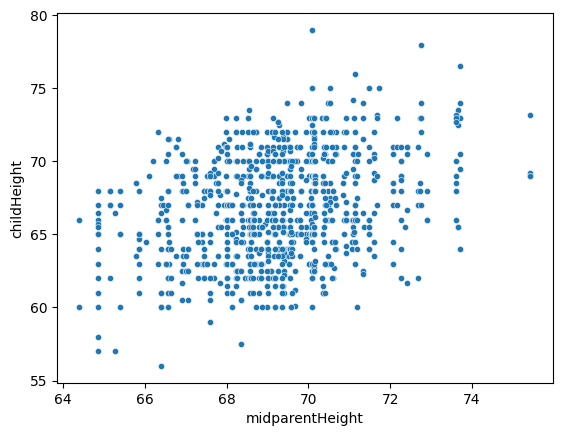

In [30]:
### revisamos la relación entre dos variables

sns.scatterplot(x='midparentHeight', y='childHeight', data=families, s=20)

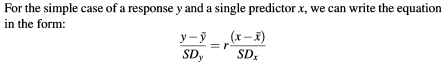

2022-03-08 21.37.15.png

In [31]:
### Aplicamos OLS a los datos

mod=smf.ols('childHeight ~ midparentHeight', families).fit()
mod.params

Intercept          22.636241
midparentHeight     0.637361
dtype: float64

In [32]:
### Calculamos la correlación

cor=sp.stats.pearsonr(families['childHeight'], families['midparentHeight'])[0]
cor

0.3209498960639593

In [33]:
### Calculamos la desviación estándar de cada columna

sdy=np.std(families['childHeight'])
sdx=np.std(families['midparentHeight'])

print(sdy)
print(sdx)

3.5773346010057634
1.8014050969207571


In [35]:
beta=cor*sdy/sdx
print(beta)

0.6373608969694791


In [36]:
alpha=np.mean(families['childHeight']-beta*np.mean(families['midparentHeight']))
print(alpha)

22.636240549589747


In [37]:
np.round([alpha, beta], 6)

array([22.636241,  0.637361])

In [40]:
beta1= sdy/sdx
print(beta1)

1.9858579323000154


In [41]:
alpha1=np.mean(families['childHeight'])-beta1*np.mean(families['midparentHeight'])
print(alpha1)

-70.68888769169183


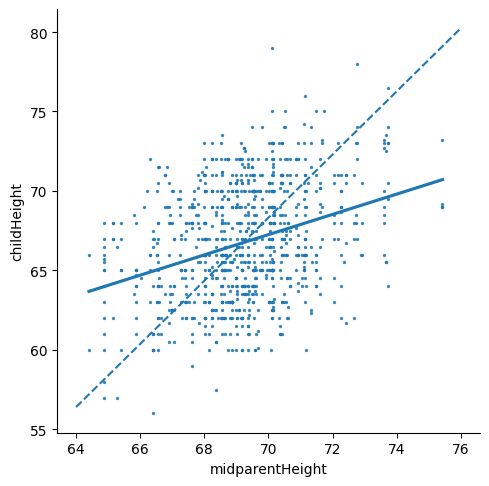

In [42]:
### Graficamos la dispersión entre dos columnas, gráficamos su recta de regresión y una línea de estimación

sns.lmplot(x='midparentHeight', y='childHeight', data=families, ci=None, scatter_kws={'s':2})
xr=np.array([64,76])
plt.plot(xr, alpha1 + xr*beta1, '--')

In [ ]:
print(xr)

[64 76]
